# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

students = pd.read_csv('StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
students.columns = [c.replace(' ', '_') for c in students.columns]
students.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
students["winsorize_math_score"] = winsorize(students["math_score"], (0.005, 0))
students["winsorize_reading_score"] = winsorize(students["reading_score"], (0.005, 0))
students["winsorize_writing_score"] = winsorize(students["writing_score"], (0.005, 0))

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


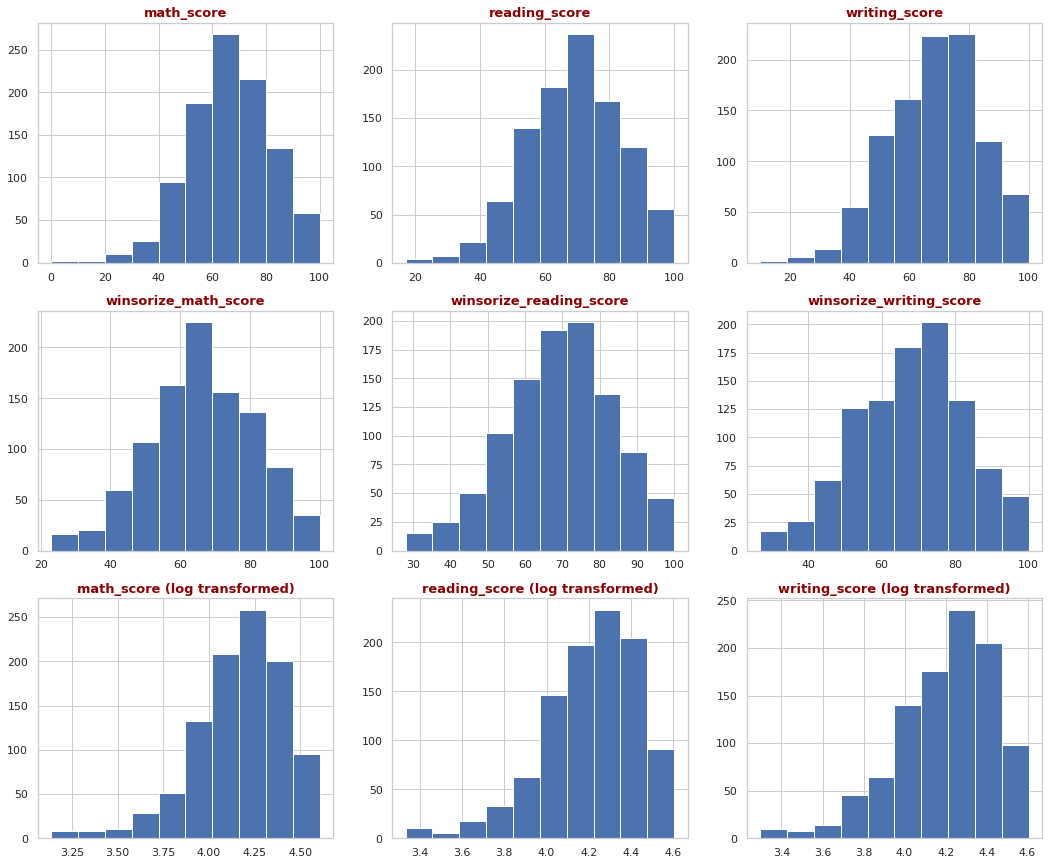

In [5]:
plt.figure(figsize=(18,15))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['math_score', 'reading_score' , 'writing_score']
winsorize_variables= ['winsorize_math_score', 'winsorize_reading_score', 'winsorize_writing_score']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(students[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(students[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(students[winsorize_variables[i]]))
    plt.title(variables[i] + ' (log transformed)', fontdict=title_font)

**Winsorized datas are much more better in the means of getting a normal distribution.**

**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [6]:
averages = []

for value in range(0,1000):
  averages.append( int( (students.math_score[value] + students.reading_score[value] 
                    + students.writing_score[value]) / 3) )


averages = pd.DataFrame(averages)
averages.columns = ['AVG_OF_3_EXAMS']
averages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AVG_OF_3_EXAMS  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [7]:
students['Averages'] = averages['AVG_OF_3_EXAMS']

In [8]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

variables = ['math_score', 'writing_score' , 'reading_score', 'Averages']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(students[variable]))
    norm_stats = normaltest(np.log(students[variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math_score,nan,nan,nan,nan
1,writing_score,1410.93701,0.00000,318.96921,0.00000
2,reading_score,495.12732,0.00000,209.77151,0.00000
3,Averages,2083.54219,0.00000,358.00146,0.00000


jarque-bera & normal_p values are 0, since there are not enough samples to use these algorithms.

(array([  2.,   4.,  12.,  41., 132., 178., 253., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <a list of 10 Patch objects>)

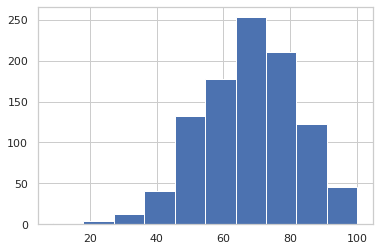

In [9]:
plt.hist(students['Averages'])

#It is negatively skewed, but its so close to a normal distribution, but I'll try to winsorize it.

{'boxes': [<matplotlib.lines.Line2D at 0x7f0f32a366d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0f32a3c710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f32a3cf90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f32a44210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0f32a36c50>,
  <matplotlib.lines.Line2D at 0x7f0f32a36f90>]}

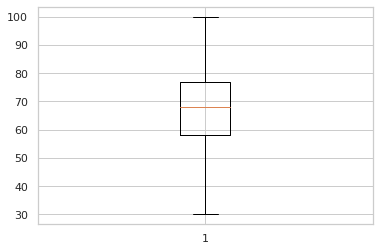

In [10]:
winsorized_avg = winsorize(np.array(averages.AVG_OF_3_EXAMS.dropna()), (0.01, 0.0))
plt.boxplot(winsorized_avg)

(array([ 18.,  29.,  73., 125., 154., 198., 182., 119.,  72.,  30.]),
 array([ 30.,  37.,  44.,  51.,  58.,  65.,  72.,  79.,  86.,  93., 100.]),
 <a list of 10 Patch objects>)

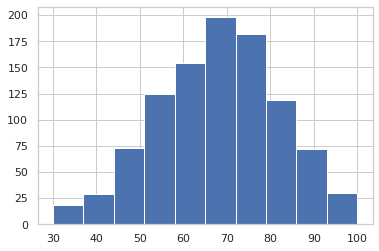

In [11]:
plt.hist(winsorized_avg)

Now we have a very good -normal- distribution.

In [12]:
students['winsorized_average'] = winsorized_avg
students.describe()

,math_score,reading_score,writing_score,winsorize_math_score,winsorize_reading_score,winsorize_writing_score,Averages,winsorized_average
count,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000
mean,66.08900,69.16900,68.05400,66.13700,69.19500,68.10000,67.44500,67.50300
std,15.16308,14.60019,15.19566,14.99931,14.52032,15.05279,14.26332,14.08447
min,0.00000,17.00000,10.00000,23.00000,28.00000,27.00000,9.00000,30.00000
25%,57.00000,59.00000,57.75000,57.00000,59.00000,57.75000,58.00000,58.00000
50%,66.00000,70.00000,69.00000,66.00000,70.00000,69.00000,68.00000,68.00000
75%,77.00000,79.00000,79.00000,77.00000,79.00000,79.00000,77.00000,77.00000
max,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000


Winsorization helped us.

**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

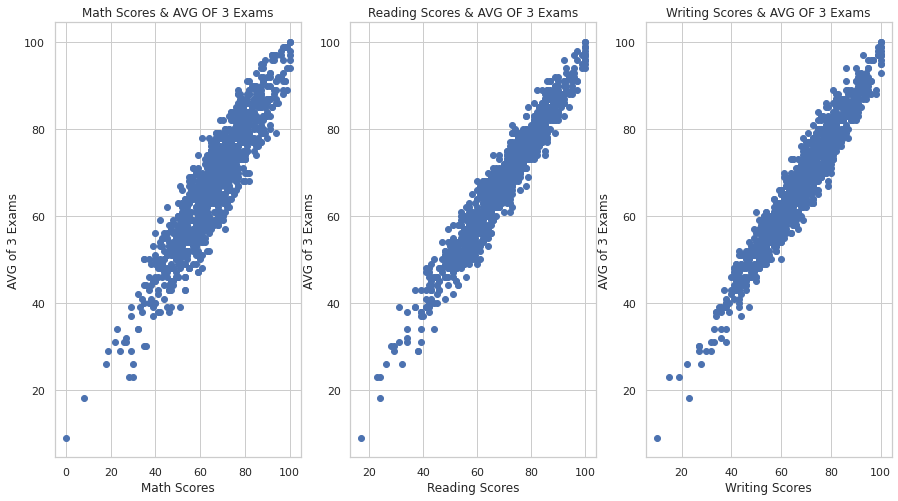

In [13]:
plt.figure(figsize=(15,8))

plt.subplot(131)
plt.scatter(students['math_score'], averages['AVG_OF_3_EXAMS'])
plt.title('Math Scores & AVG OF 3 Exams')
plt.xlabel('Math Scores')
plt.ylabel('AVG of 3 Exams')

plt.subplot(132)
plt.scatter(students['reading_score'], averages['AVG_OF_3_EXAMS'])
plt.title('Reading Scores & AVG OF 3 Exams')
plt.xlabel('Reading Scores')
plt.ylabel('AVG of 3 Exams')

plt.subplot(133)
plt.scatter(students['writing_score'], averages['AVG_OF_3_EXAMS'])
plt.title('Writing Scores & AVG OF 3 Exams')
plt.xlabel('Writing Scores')
plt.ylabel('AVG of 3 Exams')

plt.show()

In [14]:
# checking the correlation of all features
students.corr()

,math_score,reading_score,writing_score,winsorize_math_score,winsorize_reading_score,winsorize_writing_score,Averages,winsorized_average
math_score,1.00000,0.81758,0.80264,0.99831,0.81586,0.80029,0.91877,0.91606
reading_score,0.81758,1.00000,0.95460,0.81637,0.99959,0.95366,0.97005,0.96922
writing_score,0.80264,0.95460,1.00000,0.80091,0.95364,0.99887,0.96541,0.96394
winsorize_math_score,0.99831,0.81637,0.80091,1.00000,0.81601,0.80042,0.91718,0.91754
winsorize_reading_score,0.81586,0.99959,0.95364,0.81601,1.00000,0.95401,0.96899,0.96978
winsorize_writing_score,0.80029,0.95366,0.99887,0.80042,0.95401,1.00000,0.96391,0.96495
Averages,0.91877,0.97005,0.96541,0.91718,0.96899,0.96391,1.00000,0.99830
winsorized_average,0.91606,0.96922,0.96394,0.91754,0.96978,0.96495,0.99830,1.00000


# One can see that both normal&winsorized reading and writing scores are more collerated with the average of 3 exams, so we can keep them, but math_scores are less collerated with the average.

**(4)** Does the test preparation course have an impact on the target variable you created?

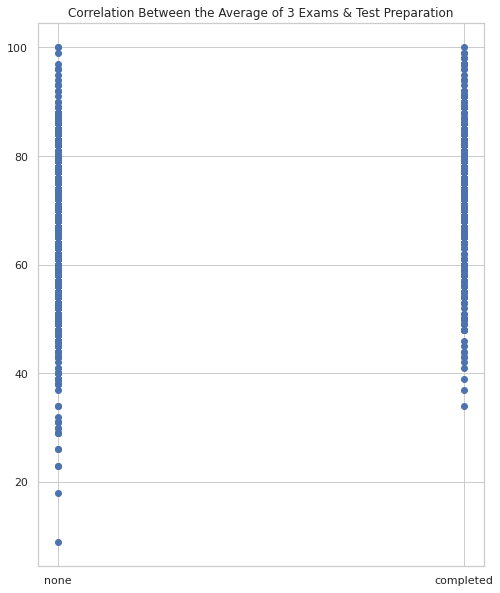

In [ ]:
plt.figure(figsize=(8,10))
plt.title('Correlation Between the Average of 3 Exams & Test Preparation')
plt.scatter(students['test_preparation_course'], students['Averages'])
plt.show()

# Yes, the test preparation has an effect on the average of the 3 classes.